<a href="https://colab.research.google.com/github/hasaninevitable/CODSOFT/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Importng necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For model evaluation
from sklearn.model_selection import cross_val_score

Mounted at /content/drive


In [6]:
# Load the dataset with specified encoding
df = pd.read_csv(dataset_path, encoding='latin1')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


VISUALIZATION

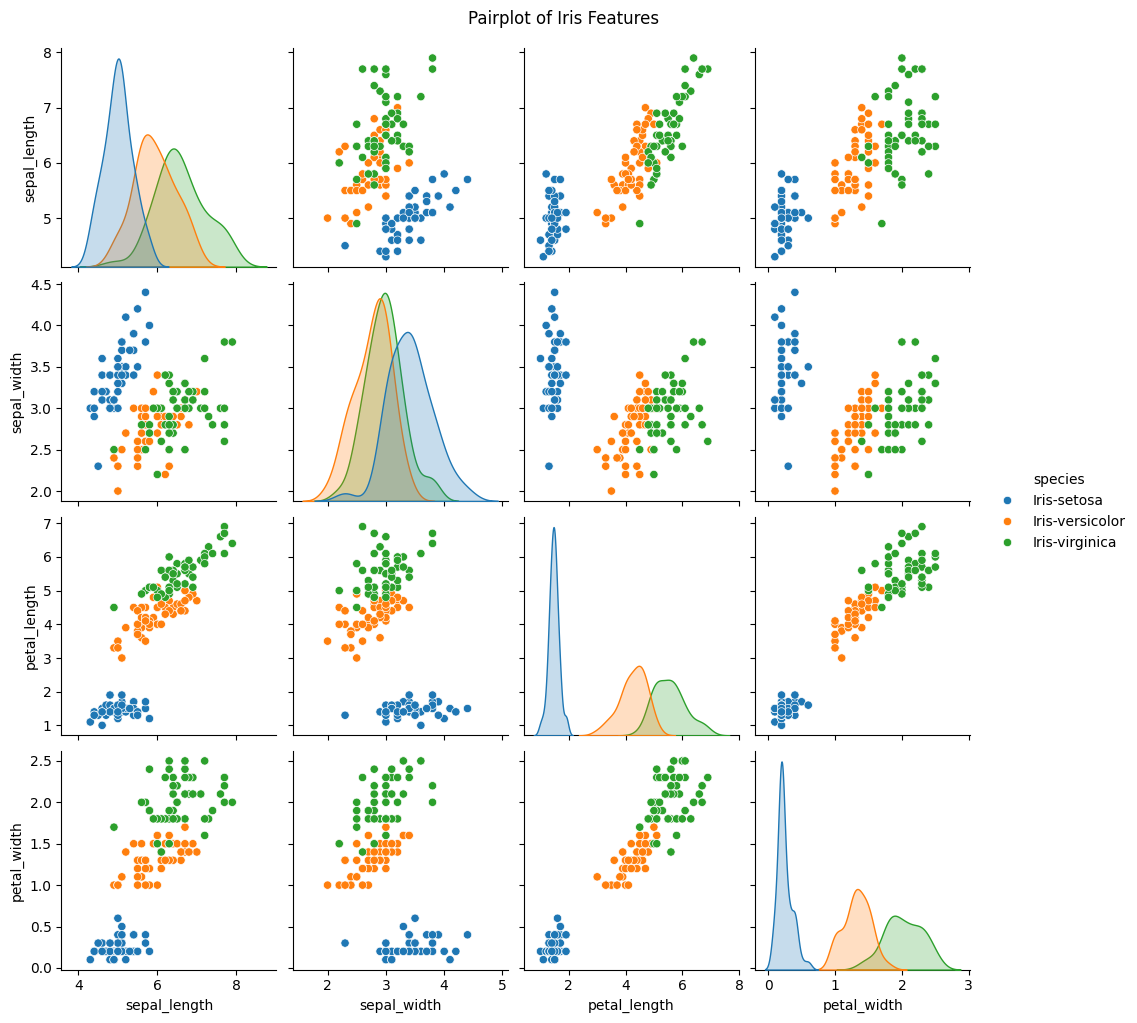

In [7]:


# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

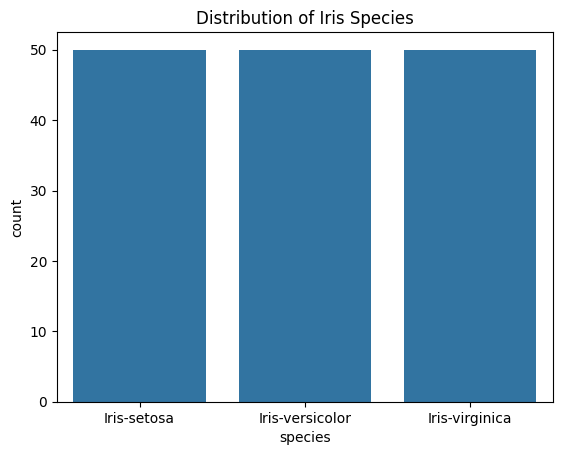

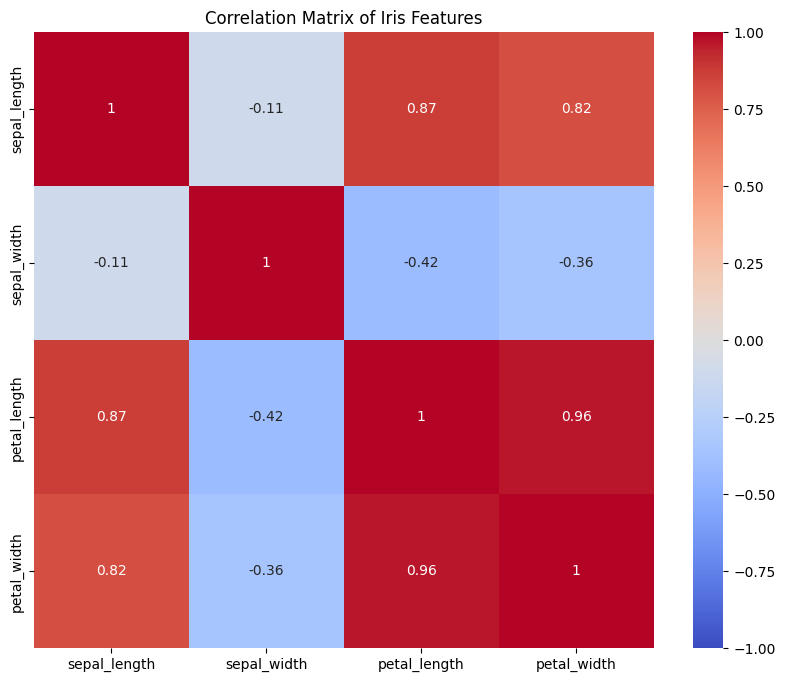

In [9]:
# Distribution of different species in the dataset
sns.countplot(data=df, x='species')
plt.title('Distribution of Iris Species')
plt.show()
# Exclude the species column to calculate the correlation matrix
corr_matrix = df.drop('species', axis=1).corr()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Iris Features')
plt.show()


preprocessing dataset

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (species)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Split the data into features and target variable
X = df.drop('species', axis=1)
y = df['species']

missing_values_count = df.isnull().sum()
# Display the count of missing values for each column
print("Count of missing values for each column:")
print(missing_values_count)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Count of missing values for each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Training set size: 120
Testing set size: 30


train the model

In [16]:
from sklearn.svm import SVC

# Train a new model using only the first two features
X_train_2f = X_train.iloc[:, :2]
X_test_2f = X_test.iloc[:, :2]

svc_model_2f = SVC(kernel='linear')
svc_model_2f.fit(X_train_2f, y_train)

SVC(kernel='linear')

Evaluate the model

In [17]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


plotting decision boundries

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


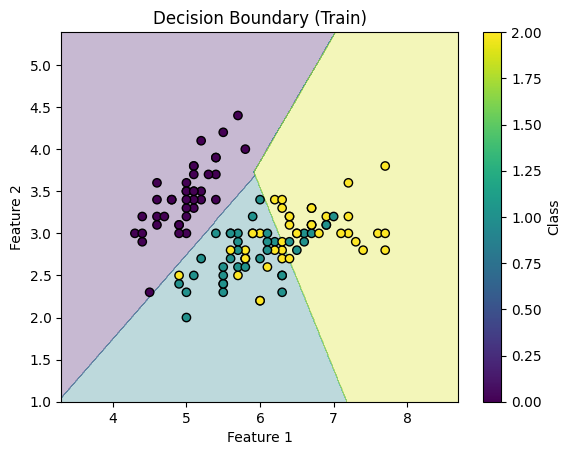

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


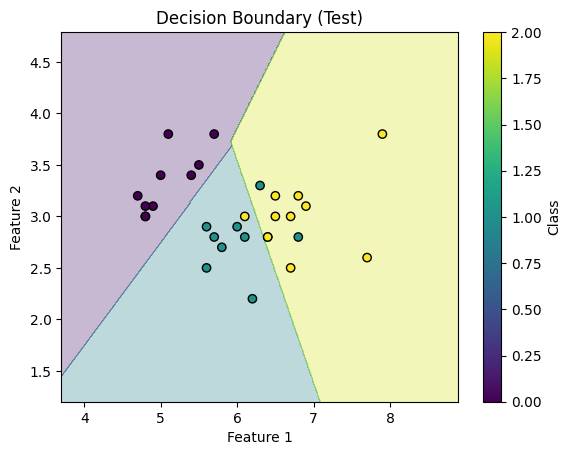

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

# Plot decision boundaries using the first two features for simplicity
plot_decision_boundaries(X_train_2f.values, y_train, svc_model_2f, 'Decision Boundary (Train)')
plot_decision_boundaries(X_test_2f.values, y_test, svc_model_2f, 'Decision Boundary (Test)')
